<h1 align="center">Data Wrangling with Python</h1>

<a href="http://www.franklinherrera.com/"><img src="https://pbs.twimg.com/media/EW3MHkmXgAEOPjH?format=png&name=900x900" align="center" width=500></a>

<h2>Table of Contents</h2>

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id="intro"></a>
<h2>Introduction</h2>

In this Jupyter notebook, we will wrangle the data from Makeover Monday week 46: Youth & adult literacy rates.

<a id='wrangling'></a>
<h2>Data Wrangling</h2>
<h3>Gathering and Loading Data</h3>

Data source: https://data.world/makeovermonday/2019w46

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

%matplotlib inline

In [2]:
headers = ["region","country","year","age","gender","literacy_rate"]
df = pd.read_excel('Literacy rates (no pw2).xlsx')
df.columns = headers
df.head()

,region,country,year,age,gender,literacy_rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411
3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791


<h3>Assessing Data</h3>

Let's use the function `.info()` to get a summary of the data to know the numbers of rows, data types, and which columns have null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
region           4955 non-null object
country          4955 non-null object
year             4955 non-null int64
age              4955 non-null object
gender           4955 non-null object
literacy_rate    4955 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 232.3+ KB


We can see that there are non-null values. But, we can double-check with `isnul()` and sum all the results with `sum()`

In [4]:
df.isnull().sum()

region           0
country          0
year             0
age              0
gender           0
literacy_rate    0
dtype: int64

The data types looks good, but let's use `dtypes` to list the data types for each column

In [5]:
df.dtypes

region            object
country           object
year               int64
age               object
gender            object
literacy_rate    float64
dtype: object

<h3>Cleaning Data</h3>

I think the data is clean enough, but we always can come back to clean data if we discover later something.

In order to don't look at duplicate data in the analysis, I will exclude the total column for the moment in a new data frame.

In [6]:
df_clean = df.query("gender != 'total'")
df_clean.head()

,region,country,year,age,gender,literacy_rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791
6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128


In [7]:
df_clean.shape

(3303, 6)

<a id='eda'></a>
<h3>Exploratory Data Analysis</h3>

Le's use `head()` function to avoid scrolling up.

In [8]:
df_clean.head()

,region,country,year,age,gender,literacy_rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791
6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128


Let's use `describe` to see main descriptive statistics.

In [9]:
df_clean.describe()

,year,literacy_rate
count,3303.000000,3303.000000
mean,2013.988193,0.817540
std,2.746317,0.234949
min,2010.000000,0.004025
25%,2011.000000,0.726998
50%,2014.000000,0.929805
75%,2016.000000,0.985546
max,2018.000000,1.000000


So, on average the literacy rate is 0.82, the minimum is 0.004, and the maximum 1.

Let's plot the distribution of Literacy rate.-

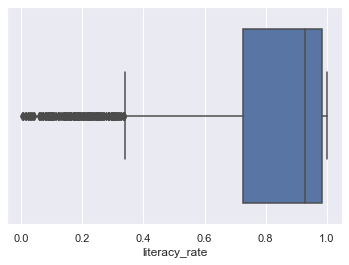

In [10]:
color_base = sb.color_palette()[0]
sb.set(style="darkgrid")

sb.boxplot(x=df_clean['literacy_rate']);

Above plot shows many points between 0.0 and 0.3, these are outliers as there are not included in the box of other observation.

Let's check the distribution of literacy rate and region.

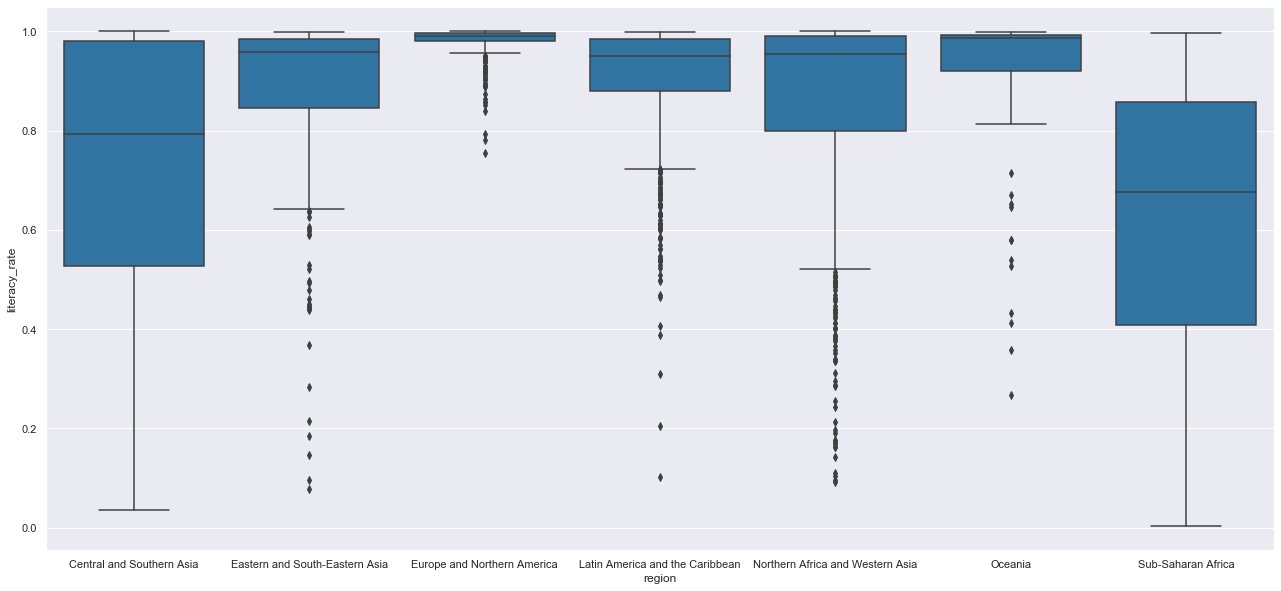

In [11]:
plt.figure(figsize=(22,10))
sb.boxplot(data=df_clean, x='region', y='literacy_rate', color=color_base);

"Central and Southern Asia" and Sub-Saharan Africa are the only ones without outliers. Because I'm not sure how this data was collected, I will opt to remove them.

I will use `value_counts` to see the uniques values of each region.

In [12]:
df_clean.region.value_counts()

Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           311
Eastern and South-Eastern Asia      282
Oceania                              96
Name: region, dtype: int64

Let's plot "Eastern and South-Eastern Asia" and take into consideration those literacy rates greater than or equal to the max value of each region, until we can't see outliers.

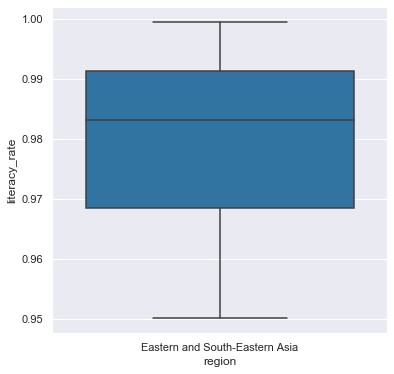

In [13]:
df_eastern_southern_asia = df_clean.query('region == "Eastern and South-Eastern Asia" and literacy_rate >= 0.950')
df_eastern_southern_asia.reset_index(drop=True, inplace=True)

plt.figure(figsize=(6,6))
sb.boxplot(data=df_eastern_southern_asia, x='region', y='literacy_rate', color=color_base);

Europe and Northern America

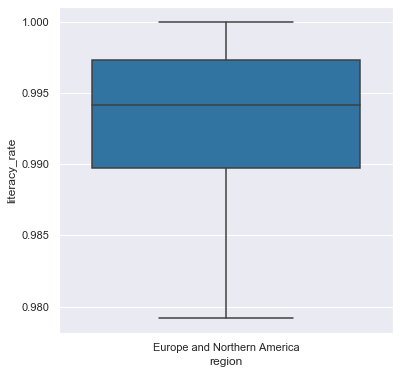

In [14]:
df_europe_northern_america = df_clean.query('region == "Europe and Northern America" and literacy_rate >= 0.978')
df_europe_northern_america.reset_index(drop=True, inplace=True)

plt.figure(figsize=(6,6))
sb.boxplot(data=df_europe_northern_america, x='region', y='literacy_rate', color=color_base);

Latin America and the Caribbean

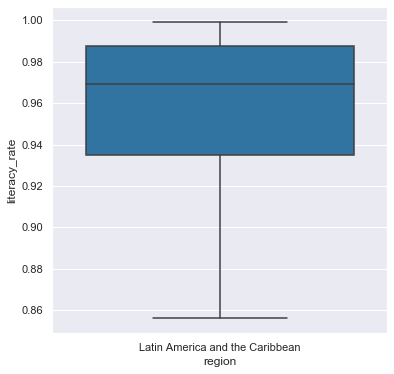

In [15]:
df_latin_america_caribbean = df_clean.query('region == "Latin America and the Caribbean" and literacy_rate >= 0.856')
df_latin_america_caribbean.reset_index(drop=True, inplace=True)

plt.figure(figsize=(6,6))
sb.boxplot(data=df_latin_america_caribbean, x='region', y='literacy_rate', color=color_base);

Northern Africa and Western Asia

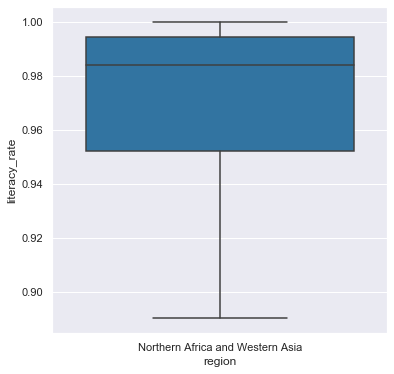

In [16]:
df_northern_africa_western_asia = df_clean.query('region == "Northern Africa and Western Asia" and literacy_rate >= 0.89')
df_northern_africa_western_asia.reset_index(drop=True, inplace=True)

plt.figure(figsize=(6,6))
sb.boxplot(data=df_northern_africa_western_asia, x='region', y='literacy_rate', color=color_base);

Oceania

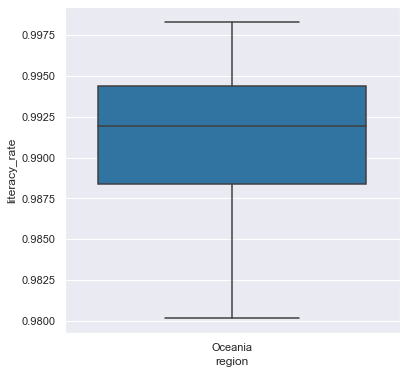

In [17]:
df_oceania = df_clean.query('region == "Oceania" and literacy_rate >= 0.98')
df_oceania.reset_index(drop=True, inplace=True)

plt.figure(figsize=(6,6))
sb.boxplot(data=df_oceania, x='region', y='literacy_rate', color=color_base);

Let's create a temporal data frame with the regions that don't have outliers to then concatenate it with the other data frame regions. 

In [19]:
df_temp = df_clean.query('region == "Central and Southern Asia" or region == "Sub-Saharan Africa"')
df_new = pd.concat([df_eastern_southern_asia, df_europe_northern_america, df_latin_america_caribbean, 
                    df_northern_africa_western_asia, df_oceania, df_temp], ignore_index=True)
df_new.region.value_counts()

Sub-Saharan Africa                  770
Latin America and the Caribbean     735
Northern Africa and Western Asia    386
Central and Southern Asia           311
Europe and Northern America         255
Eastern and South-Eastern Asia      158
Oceania                              57
Name: region, dtype: int64

In [20]:
df_new.shape

(2672, 6)

This is the resulting data frame.

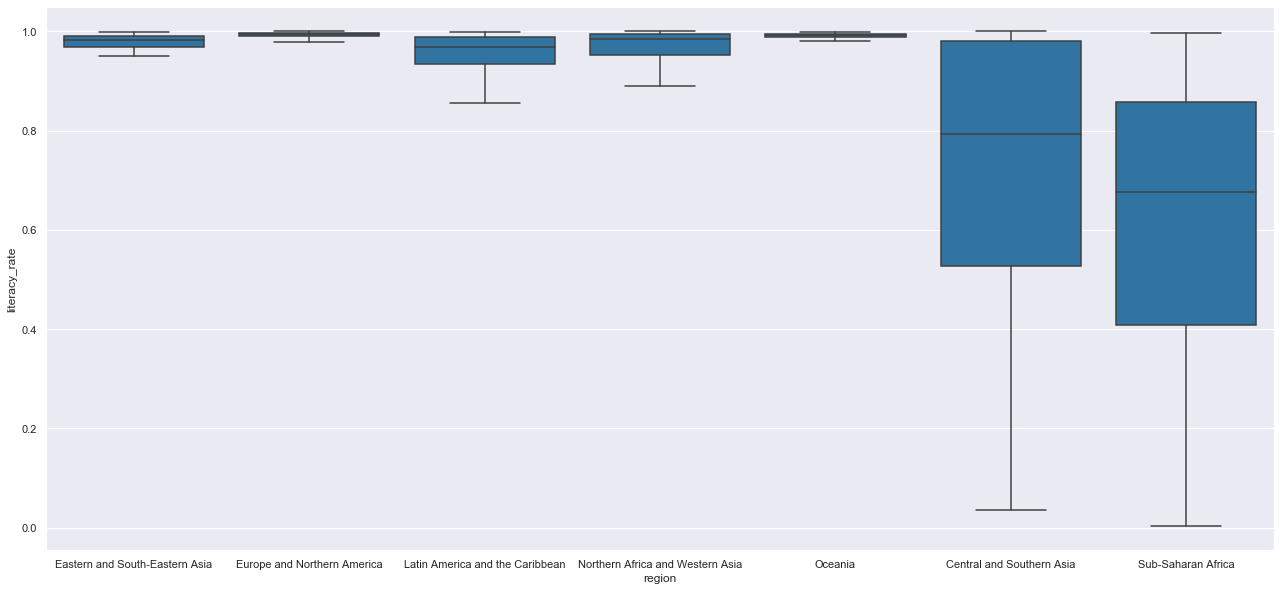

In [21]:
plt.figure(figsize=(22,10))
sb.boxplot(data=df_new, x='region', y='literacy_rate', color=color_base);

Let's see literacy rates by region, but using a horizontal chart.

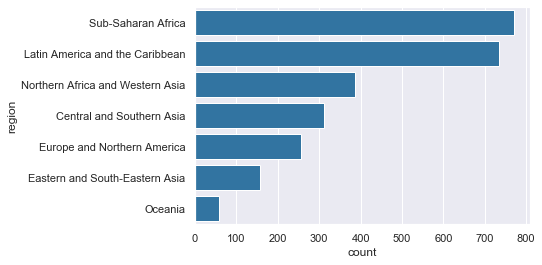

In [22]:
index = df_new['region'].value_counts().index
sb.countplot(data=df_new, y="region", color=color_base, order=index);

Let's see in which year are more data.

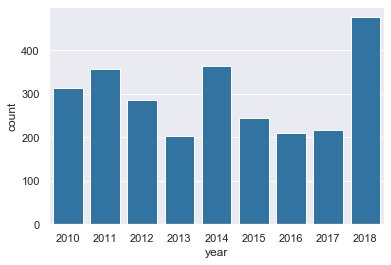

In [23]:
sb.countplot(data=df_new, x='year', color=color_base);

Now, let's save this file to visualizae it in Power BI.

In [24]:
df_new.to_csv("literacy_rates_cleaned.csv", index=False)